In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import time
import winsound

In [5]:
import matplotlib.pyplot as plt
import cv2


{'buildings' -> 0, 

'forest' -> 1,

'glacier' -> 2,

'mountain' -> 3,

'sea' -> 4,

'street' -> 5 }

In [2]:
train=pd.read_csv("train.csv")
train.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [3]:
train.shape

(17034, 2)

In [6]:
img=cv2.imread("train\\0.jpg",0)

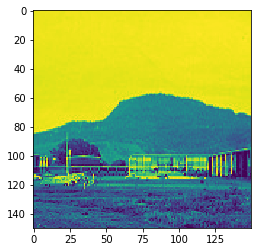

In [7]:
plt.imshow(img)

In [27]:
img1=cv2.imread("train\\1.jpg",0)

In [11]:
cv2.imshow("abc",img)

In [6]:
import numpy as np

In [63]:
image=[]
count=0

In [64]:
s=time.time()
for i in train["image_name"]:
    img=cv2.imread("train\\"+i,0)
    image.append(sum(img))
    count=count+1
    if count%1000==0:
        print("{}/{}".format(count,17034))
        winsound.MessageBeep()
print("Time taken:",time.time()-s)

1000/17034
2000/17034
3000/17034
4000/17034
5000/17034
6000/17034
7000/17034
8000/17034
9000/17034
10000/17034
11000/17034
12000/17034
13000/17034
14000/17034
15000/17034
16000/17034
17000/17034
Time taken: 197.38141465187073


In [65]:
image=pd.DataFrame(image)

In [66]:
image.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,71,133,58,35,12,64,76,113,246,255,...,28,57,136,112,114,81,244,165,91,109
1,97,176,6,181,112,81,254,119,132,149,...,205,58,79,112,215,147,154,157,174,60
2,231,10,81,159,217,115,91,188,143,165,...,58,232,126,219,189,185,54,106,37,249
3,38,224,151,21,87,58,89,101,229,32,...,41,109,164,137,104,57,223,76,229,14
4,6,16,110,111,202,101,126,142,157,123,...,146,203,161,199,83,20,188,52,90,11


In [67]:
image.shape

(17034, 150)

In [68]:
image["Label"]=train["label"]

In [69]:
image.shape

(17034, 151)

In [70]:
image.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,71,133,58,35,12,64,76,113,246,255,...,57,136,112,114,81,244,165,91,109,0
1,97,176,6,181,112,81,254,119,132,149,...,58,79,112,215,147,154,157,174,60,4
2,231,10,81,159,217,115,91,188,143,165,...,232,126,219,189,185,54,106,37,249,5
3,38,224,151,21,87,58,89,101,229,32,...,109,164,137,104,57,223,76,229,14,0
4,6,16,110,111,202,101,126,142,157,123,...,203,161,199,83,20,188,52,90,11,4


In [72]:
x=image.iloc[:,:-1]
y=image["Label"]

In [73]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,71,133,58,35,12,64,76,113,246,255,...,28,57,136,112,114,81,244,165,91,109
1,97,176,6,181,112,81,254,119,132,149,...,205,58,79,112,215,147,154,157,174,60
2,231,10,81,159,217,115,91,188,143,165,...,58,232,126,219,189,185,54,106,37,249
3,38,224,151,21,87,58,89,101,229,32,...,41,109,164,137,104,57,223,76,229,14
4,6,16,110,111,202,101,126,142,157,123,...,146,203,161,199,83,20,188,52,90,11


In [74]:
y.head()

0    0
1    4
2    5
3    0
4    4
Name: Label, dtype: int64

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA()


In [77]:
pca.fit_transform(x)

array([[  27.00840863,   15.92563354,  -19.09134468, ...,  -63.28863304,
         -59.38817438,   -6.51395224],
       [   0.27300354,   33.75110939,  -62.5577124 , ...,  -62.00350501,
         -11.03144354,  -28.60452243],
       [ 129.38345747,  -72.21178047,   31.47360333, ..., -137.62621479,
         -13.7815384 ,  -87.54949357],
       ...,
       [ -72.26436545,   27.61631555,  -19.72031026, ...,  100.79962221,
         -48.07786371,  -11.80675544],
       [  58.81382369, -189.05948645,   11.00758304, ...,   33.25674912,
        -101.99457156,  -15.22567775],
       [ -76.48061871,   38.46936401,  -19.70204525, ...,  -19.15383776,
          31.65101859,  -83.68646604]])

In [87]:
sum(pca.explained_variance_.cumsum()/sum(pca.explained_variance_)<0.7)

99

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.2)

In [97]:
x_train.shape

(13627, 150)

In [ ]:
t=time.time()
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test2b = {
  'min_child_weight':[5,6],
  'max_depth': range(3,10,2),
  'n_estimators':[150,200,300,400],
   'scale_pos_weight':[1,2,3,4],
   'colsample_bytree':[0.7,0.8], 
   'subsample':[0.7,0.8],
   'gamma':[0,0.2,0.4]
    
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, objective="multi:softmax", nthread=4, seed=27), 
                         param_grid = param_test2b, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(x_train,y_train)


In [ ]:
print("time taken:",time.time()-t,"seconds")

In [ ]:
winsound.MessageBeep()


In [106]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [101]:
from sklearn.metrics import cohen_kappa_score,accuracy_score,confusion_matrix

In [98]:
ts=time.time()
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'multi:softmax',scale_pos_weight=3,seed=29)
modelXg.fit(x_train,y_train)
y_xg = modelXg.predict(x_cv)
print("tree_bagged",cohen_kappa_score(y_xg,y_cv),accuracy_score(y_cv,y_xg))
print("time taken:",time.time()-t,"seconds")

NameError: name 'cohen_kappa_score' is not defined

In [100]:
print("tree_bagged",cohen_kappa_score(y_xg,y_cv),accuracy_score(y_cv,y_xg))
print("time taken:",time.time()-t,"seconds")

tree_bagged -0.003601524974138348 0.16495450542999707
time taken: 1281.6703515052795 seconds


In [102]:
confusion_matrix(y_cv,y_xg)

array([[ 57,  72, 111, 137,  79, 110],
       [ 55,  77, 115, 125,  78,  96],
       [ 54,  80, 128, 134,  94,  89],
       [ 64,  92, 107, 142,  97, 105],
       [ 48,  76, 115, 124,  74, 102],
       [ 53,  81, 111, 150,  91,  84]], dtype=int64)